In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Task 1: Exploratory Data Analysis (EDA)
    
1.	Load the Mushroom dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.


In [2]:
df= pd.read_csv(r'/Users/rahulpoojith/Documents/Excelr Datasets/Machine Learning Datasets/mushroom.csv')

In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

1024

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'stalk_height'}>],
       [<Axes: title={'center': 'cap_diameter'}>, <Axes: >]], dtype=object)

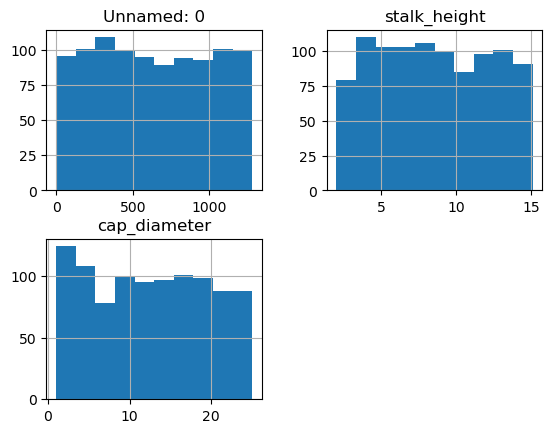

In [9]:
df.hist()

<Axes: >

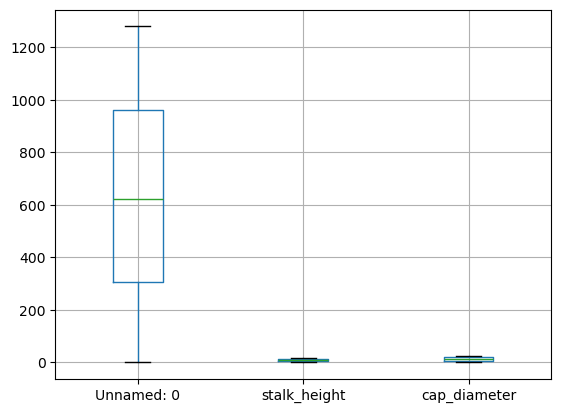

In [10]:
df.boxplot()

In [11]:
import seaborn as sns
df.corr

<bound method DataFrame.corr of       Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    pa

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_color_ab

In [13]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,976.000000,976.000000,976.000000
mean,633.275615,8.524684,12.598566
std,372.262936,3.703043,6.987077
min,0.000000,2.000000,1.000000
25%,306.750000,5.326820,6.141161
50%,622.500000,8.367245,12.626094
75%,959.250000,11.758624,18.559780
max,1279.000000,15.095066,25.000054


Task 2: Data Preprocessing
    
1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.


In [14]:
cat_df = df.select_dtypes(include='object')  ## Find the categorical variable

In [15]:
cat_df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,red,yellow,universal,brown,none,large,brown,numerous,paths,edible
1988,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,pink,pink,partial,brown,two,pendant,yellow,numerous,grasses,poisonous
1989,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,brown,red,universal,orange,two,none,orange,abundant,grasses,edible
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous


In [16]:
df['cap_color'].value_counts()  ## cap colour before label Encoding

cap_color
brown     127
yellow    114
pink      112
red       110
green     108
gray      105
buff      104
purple    100
white      96
Name: count, dtype: int64

In [17]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')


In [18]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}, Unique Values: {unique_vals}")

Column: Unnamed: 0, Unique Values: [1167 1037  309  282  820  389  330   98  597   16  243  621  875  221
 1178  236 1279  539 1117  857  707  781  140  910   34 1083   50  552
 1154 1198  537  277  109  699  796  737   20  497  223  810 1043   94
  782  771 1275  764 1089  453  965  549  408   88 1195  884 1082  377
  553  987 1108  519  354  896 1054  119  177  913 1007  943  532  957
  181  326  280 1136  547   82  379  518  582  632  962  275 1122  763
 1186 1258  742  383 1049  541  349  879  604 1046  778  466  493 1197
  894  385  138  666 1147  591  661  565  602  224  686  588 1005  151
 1204 1153  534  548  801  115 1004 1035   69  779 1240 1105  966 1268
  669  986  596  270  479  724  900  804  234   29  507    8  414  720
  852   53 1192  182  231  694  471  954  183  706  988  503  218  996
  194  303  254 1123  462  639  102 1187  622  903   76  258   91  204
  403  203  654 1132  321  893  463  745 1088   73 1194  396 1060  656
  415  911 1063  452   92  141  540 1250  

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Instantiate LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])

# Drop the original categorical columns if no longer needed
df = df.drop(columns=categorical_cols)

In [21]:
print(df.head())

   Unnamed: 0  stalk_height  cap_diameter  cap_shape_encoded  \
0        1167     14.276173      5.054983                  4   
1        1037      3.952715     19.068319                  4   
2         309      9.054265      7.205884                  3   
3         282      5.226499     20.932692                  0   
4         820     14.037532     12.545245                  3   

   cap_surface_encoded  cap_color_encoded  bruises_encoded  odor_encoded  \
0                    2                  7                0             1   
1                    0                  6                0             1   
2                    1                  5                1             4   
3                    2                  4                1             3   
4                    3                  8                1             5   

   gill_attachment_encoded  gill_spacing_encoded  ...  \
0                        1                     2  ...   
1                        3                  

In [22]:
# Encode all columns in the DataFrame
df_encoded = df.apply(le.fit_transform)

In [23]:
df_encoded

,Unnamed: 0,stalk_height,cap_diameter,cap_shape_encoded,cap_surface_encoded,cap_color_encoded,bruises_encoded,odor_encoded,gill_attachment_encoded,gill_spacing_encoded,...,stalk_color_above_ring_encoded,stalk_color_below_ring_encoded,veil_type_encoded,veil_color_encoded,ring_number_encoded,ring_type_encoded,spore_print_color_encoded,population_encoded,habitat_encoded,class_encoded
0,889,916,190,4,2,7,0,1,1,2,...,3,8,0,0,2,6,3,1,5,1
1,786,128,750,4,0,6,0,1,3,1,...,2,0,1,0,2,6,1,2,5,0
2,246,537,281,3,1,5,1,4,1,1,...,8,3,1,3,2,6,6,0,5,1
3,221,234,829,0,2,4,1,3,3,0,...,8,5,0,3,2,0,4,1,0,1
4,630,895,484,3,3,8,1,5,2,1,...,3,7,1,2,0,4,8,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,667,819,389,1,1,0,0,4,3,1,...,6,8,1,0,0,3,1,2,3,0
1988,707,112,743,0,1,4,1,1,1,2,...,5,5,0,0,2,5,8,2,0,1
1989,227,830,610,4,3,5,1,1,1,1,...,0,6,1,1,2,4,5,0,0,0
1996,885,335,521,4,2,5,1,5,0,2,...,5,4,0,2,1,7,8,2,5,1


### 2.	Split the dataset into training and testing sets.

In [24]:
fetures = df_encoded.drop(columns= ['class_encoded'])
target = df_encoded['class_encoded']

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fetures, target, test_size=0.2, random_state=50)

Task 3: Data Visualization
    
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.


<Axes: >

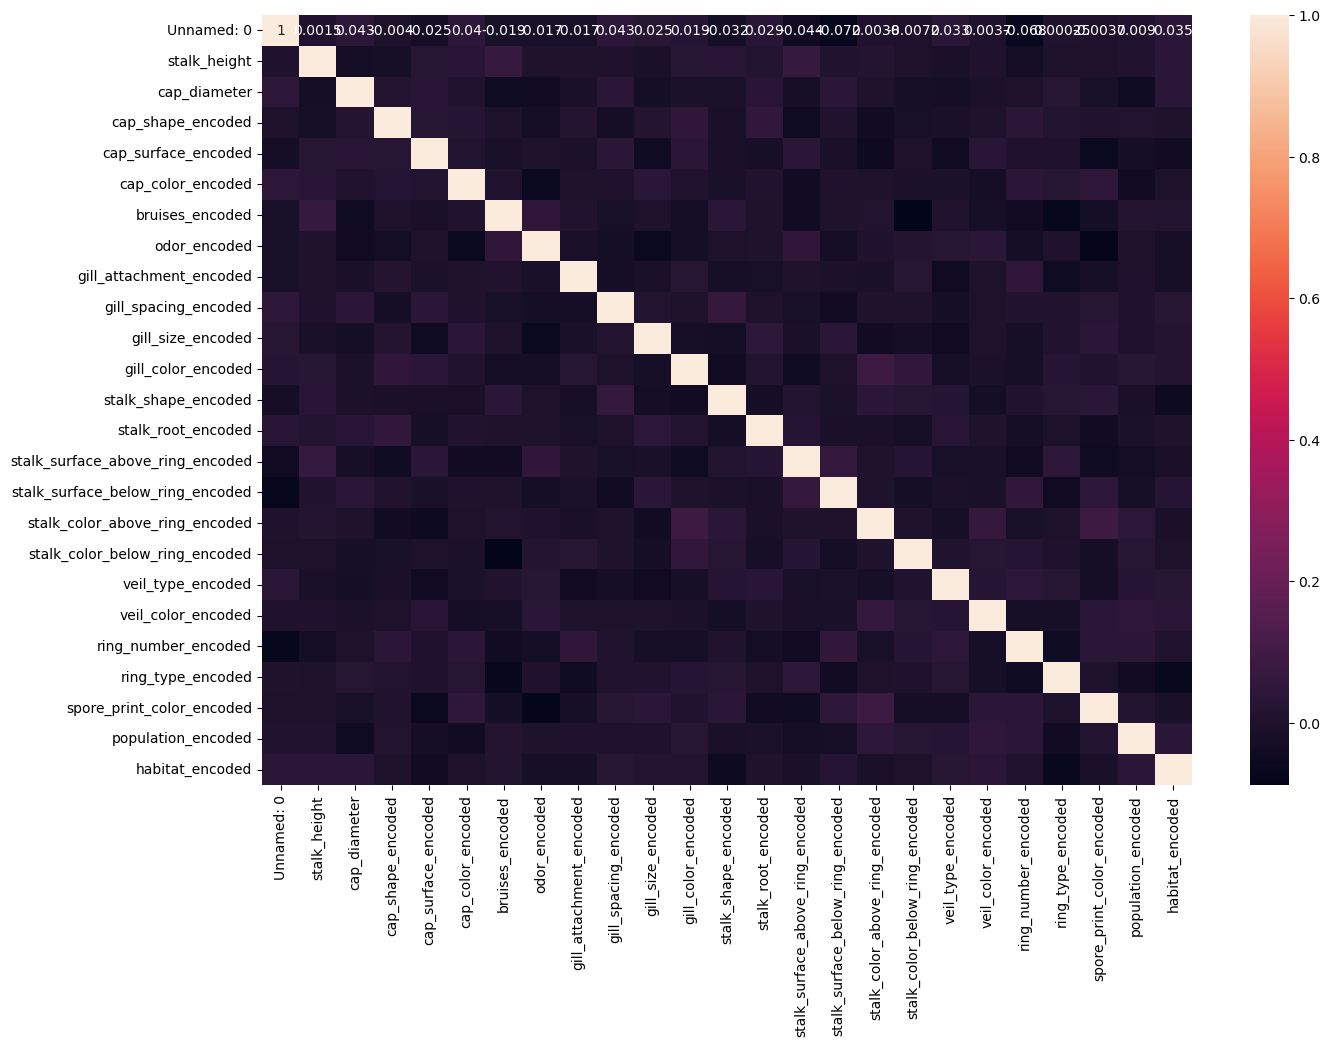

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(fetures.corr(),annot=True)

ValueError: x and y must be the same size

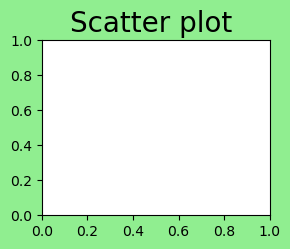

In [28]:
fig=plt.figure(figsize=(10,5),facecolor='lightgreen')
fig.add_subplot(2,3,5)
plt.title('Scatter plot ',color='black',size=20)
plt.scatter(fetures,target,marker='*',linewidth=2,color='red')
plt.plot(fetures,target,color='green',linewidth=2,linestyle='--')
plt.xlabel('Features',color='red',size=15)
plt.ylabel('Target',color='red',size=10);

Scatter Plots: Visualize relationships between two features.
    
Pair Plots: Show pairwise relationships and distributions for multiple features.
    
Histograms and KDE Plots: Illustrate the distribution of individual features.
    
Correlation Heatmap: Displays correlations between numerical features.

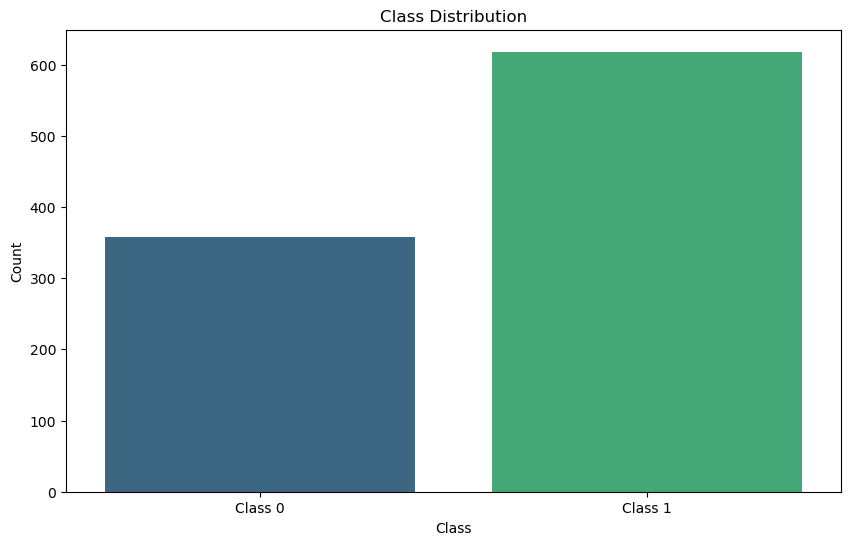

In [29]:
# Calculate class distribution
class_counts = target.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=class_counts.index, labels=[f'Class {i}' for i in class_counts.index])
plt.show()

Task 4: SVM Implementation
    
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [30]:
std_sca= StandardScaler()

In [31]:
features= std_sca.fit_transform(fetures)

In [32]:
features

array([[ 1.42503845,  1.53155283, -1.05591268, ..., -0.37063718,
        -0.83364241,  0.99462141],
       [ 1.05946196, -1.26538998,  0.93168765, ..., -1.13219905,
        -0.24955412,  0.99462141],
       [-0.85715264,  0.18632272, -0.73292762, ...,  0.77170563,
        -1.4177307 ,  0.99462141],
       ...,
       [-0.92458908,  1.22630272,  0.43478757, ...,  0.39092469,
        -1.4177307 , -1.57622207],
       [ 1.41084131, -0.53066008,  0.11890109, ...,  1.5332675 ,
        -0.24955412,  0.99462141],
       [ 1.15884198,  1.20855562,  1.22272913, ...,  1.15248656,
        -0.24955412,  0.48045272]])

In [33]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.70,random_state=50)

In [34]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 0.32121041  0.85716306 -1.22272913 ... -1.13219905 -0.24955412
  -1.06205337]
 [ 1.37534844  0.22536634 -0.03726751 ... -1.13219905  0.91862247
  -0.54788468]
 [ 1.71607993 -1.04177653 -0.26442183 ...  1.15248656 -0.24955412
  -1.06205337]
 ...
 [-1.19078556 -0.77911947  1.58830562 ...  0.01014375  0.91862247
  -0.54788468]
 [-1.11270126 -1.28313708  0.84650478 ... -1.13219905  1.50271076
   1.50879011]
 [ 1.11979983 -0.8927009  -0.08340823 ...  1.15248656 -0.24955412
   0.48045272]]
[[ 0.9210398   0.38863965 -0.60515331 ...  1.15248656  0.33453418
  -0.54788468]
 [ 1.64864349  0.73648279 -0.23247825 ...  0.39092469  0.91862247
  -0.03371598]
 [-1.283067   -1.69132036 -0.27861897 ...  1.15248656  0.33453418
  -0.54788468]
 ...
 [-0.64419546  0.53771528  0.21828111 ... -0.75141812 -1.4177307
   0.99462141]
 [ 1.47472846 -1.32573012 -1.18368698 ...  1.15248656 -0.24955412
   0.99462141]
 [-1.21208127 -0.5164624   1.20853199 ...  1.15248656  0.91862247
  -1.06205337]]
713     0
478    

In [35]:
from sklearn.svm import SVC

In [36]:
svc=SVC(C=1.0,kernel='rbf',gamma=0.2)

In [37]:
svc.fit(x_train,y_train)

SVC(gamma=0.2)

In [38]:
y_pred= svc.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.6416382252559727

In [40]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.64      1.00      0.78       188

    accuracy                           0.64       293
   macro avg       0.32      0.50      0.39       293
weighted avg       0.41      0.64      0.50       293



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
